In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

In [2]:
url = "https://raw.githubusercontent.com/JavoAlejandro/Longevidad_NBA/main/data_final.csv"
data = pd.read_csv(url)
data.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,NOK,CHI,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT
0,Jaren Jackson Jr.,19,58,56.0,1515,298,589,0.506,51,142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Noah Vonleh,19,25,0.0,259,30,76,0.395,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jayson Tatum,19,80,80.0,2443,397,835,0.475,105,242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Markelle Fultz,19,14,0.0,253,45,111,0.405,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maurice Harkless,19,76,59.0,1974,260,564,0.461,32,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.columns

Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS', 'target', 'PF_y',
       'SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT'],
      dtype='object')

In [4]:
data['target'].value_counts()

target
1    968
0    564
Name: count, dtype: int64

<Axes: xlabel='target'>

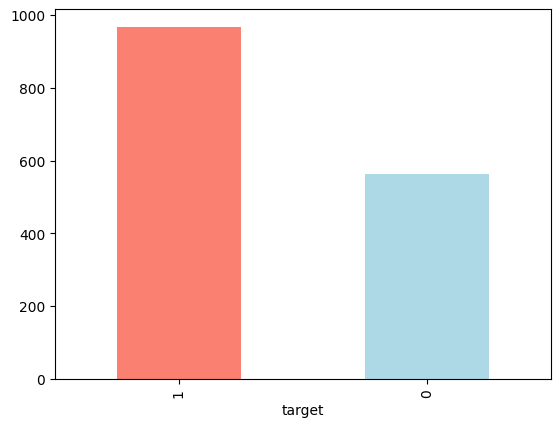

In [5]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

## Normalizar

In [6]:
data_copy = deepcopy(data)

In [7]:
jugadores = data.pop('Player')

data_norm = data[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS']]

scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_norm), columns=data_norm.columns)

In [8]:
data_norm[['PF_y','SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT']] = data[['PF_y','SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
                            'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
                            'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
                            'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
                            'TOR', 'TOT']]

target = data['target']

In [9]:
data_norm

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,NOK,CHI,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT
0,-2.375788,0.279595,1.775700,0.725026,1.115158,0.888469,0.693095,1.314143,1.257404,0.659583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.375788,-1.079038,-0.672487,-0.886156,-0.820420,-0.816747,-0.251170,-0.357764,-0.429904,0.721545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.375788,1.185350,2.824923,1.915453,1.830166,1.706176,0.429381,3.276816,2.565395,0.838318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.375788,-1.531915,-0.672487,-0.893853,-0.712085,-0.700407,-0.166101,-0.539493,-0.586863,-0.195963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.375788,1.020668,1.906853,1.313825,0.840710,0.805369,0.310285,0.623572,0.930407,0.457016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,3.106879,-0.255624,-0.541334,-0.859218,-0.719308,-0.717027,-0.081032,-0.539493,-0.599943,-2.579100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1528,3.106879,0.073742,-0.672487,-0.728373,-0.610973,-0.584067,-0.174608,0.078385,0.197932,0.468932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1529,3.106879,-0.626160,-0.366463,-0.551349,-0.430415,-0.421190,0.055078,-0.503147,-0.573783,0.995605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,3.106879,1.226521,0.726477,0.741702,0.017367,0.104003,-0.089539,-0.539493,-0.586863,-0.195963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA
Ahora vamos a aplicar un PCA con un 95% de la varianza para reducir la dimensionalidad de nuestro dataset.

In [10]:
pca = PCA(0.95)
X_ = pca.fit_transform(data_norm)

In [11]:
X_.shape

(1532, 17)

Con 95% de varianza se obtiene una cantidad de 17 componentes, probamos con 99% pero esto nos dio 42 componentes lo cual sigue siendo bastante por lo cual 95% es un buen porcentaje para entrenar nuestros modelos.

In [12]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test,  y_pred)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Regresion Logistica

In [13]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_, target, test_size=0.25, random_state=42)

In [14]:
solvers = ['liblinear', 'lbfgs', 'saga']
models = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, random_state=42)
    model.fit(X_train, y_train)
    models[solver] = model

In [15]:
y_pred = models['liblinear'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       140
           1       0.78      0.81      0.79       243

    accuracy                           0.73       383
   macro avg       0.71      0.71      0.71       383
weighted avg       0.73      0.73      0.73       383



In [16]:
y_pred = models['lbfgs'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       140
           1       0.78      0.81      0.79       243

    accuracy                           0.73       383
   macro avg       0.71      0.71      0.71       383
weighted avg       0.73      0.73      0.73       383



In [17]:
y_pred = models['saga'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       140
           1       0.78      0.81      0.79       243

    accuracy                           0.73       383
   macro avg       0.71      0.71      0.71       383
weighted avg       0.73      0.73      0.73       383



In [18]:
from sklearn.metrics import confusion_matrix

#Se escoge el modelo con solver "saga"
y_pred = models['saga'].predict(X_test)
def matriz_confusion(y_test,y_pred):
    matriz = confusion_matrix(y_test, y_pred)

    #Se normaliza la matriz
    matriz_normalizada = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_normalizada, annot=True, fmt='.1%', cmap='Blues')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de confusion')
    plt.show()

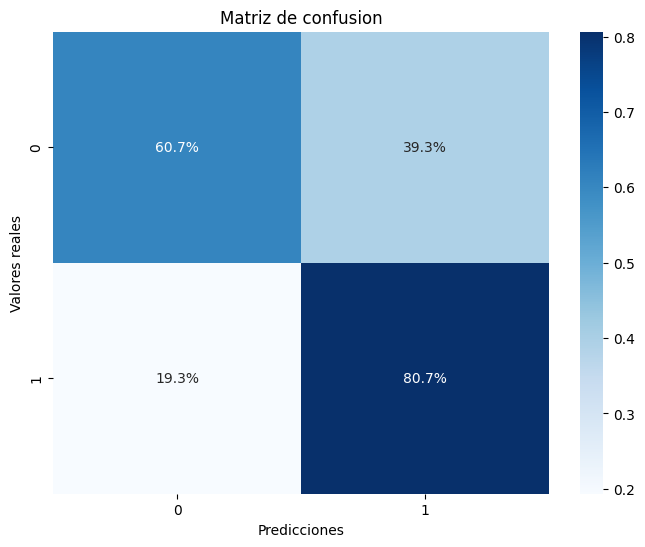

In [19]:
matriz_confusion(y_test,y_pred)

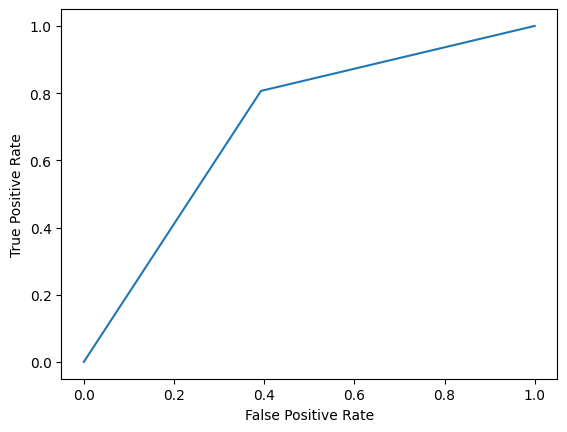

In [20]:
plot_roc_curve(y_test, y_pred)

## SVM

In [21]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.1, 1, 10]
degrees = [2, 3, 4]

for kernel_ in kernels:
    for C in Cs:
        if kernel_ == 'poly':
            for degree_ in degrees:
                clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel=kernel_, C=C, degree=degree_))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                acc = metrics.accuracy_score(y_test, y_pred)
                print(f'kernel = {kernel_}, con C = {C} con degree = {degree_}. La accuracy es: {acc}')
        else:
            clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel=kernel_, C=C))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = metrics.accuracy_score(y_test, y_pred)
            print(f'kernel = {kernel_}, con C = {C}. La accuracy es: {acc}')

kernel = linear, con C = 0.1. La accuracy es: 0.7389033942558747
kernel = linear, con C = 1. La accuracy es: 0.7336814621409922
kernel = linear, con C = 10. La accuracy es: 0.7389033942558747
kernel = poly, con C = 0.1 con degree = 2. La accuracy es: 0.6318537859007833
kernel = poly, con C = 0.1 con degree = 3. La accuracy es: 0.6318537859007833
kernel = poly, con C = 0.1 con degree = 4. La accuracy es: 0.6370757180156658
kernel = poly, con C = 1 con degree = 2. La accuracy es: 0.6762402088772846
kernel = poly, con C = 1 con degree = 3. La accuracy es: 0.6657963446475196
kernel = poly, con C = 1 con degree = 4. La accuracy es: 0.6344647519582245
kernel = poly, con C = 10 con degree = 2. La accuracy es: 0.7023498694516971
kernel = poly, con C = 10 con degree = 3. La accuracy es: 0.6422976501305483
kernel = poly, con C = 10 con degree = 4. La accuracy es: 0.6370757180156658
kernel = rbf, con C = 0.1. La accuracy es: 0.7049608355091384
kernel = rbf, con C = 1. La accuracy es: 0.7154046997

El mejor modelo de estos vendria siendo el linear con C = 0.1

In [22]:
clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', C=0.1))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       140
           1       0.77      0.84      0.80       243

    accuracy                           0.74       383
   macro avg       0.72      0.70      0.71       383
weighted avg       0.73      0.74      0.73       383



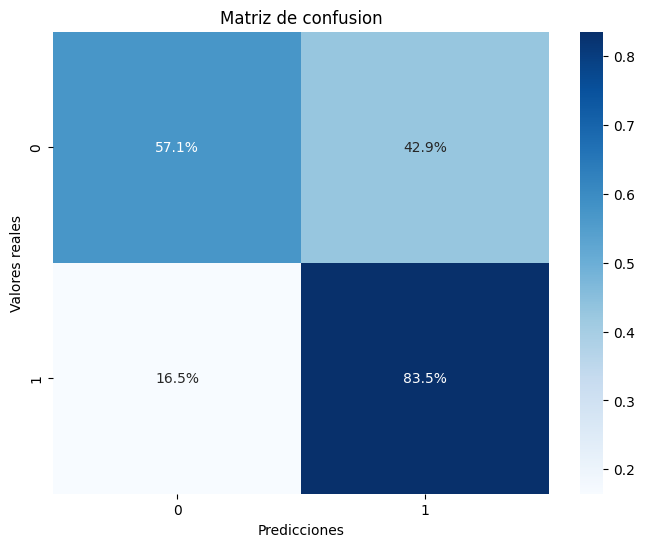

In [23]:
y_pred = clf.predict(X_test)
matriz_confusion(y_test,y_pred)

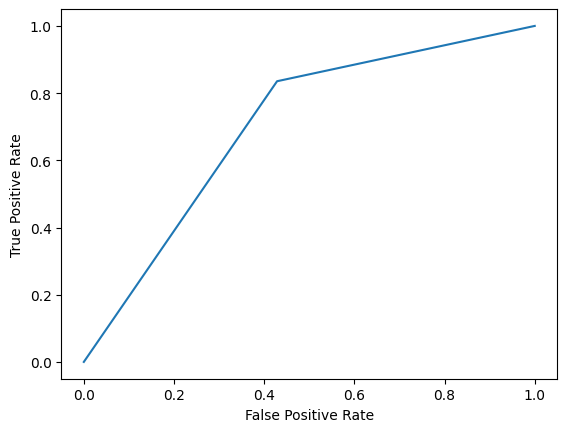

In [24]:
plot_roc_curve(y_test, y_pred)

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

criterion = ["gini", "entropy", "log_loss"]
best_mean_accuracy = 0

for criterion_ in criterion:
      clf = make_pipeline(StandardScaler(), RandomForestClassifier(criterion=criterion_))
      clf.fit(X_train, y_train.ravel())
      y_pred = clf.predict(X_test)
      acc = metrics.accuracy_score(y_test.ravel(), y_pred)
      print(
          "For criterion =",
          criterion_,
          "The accuracy is :",
          acc,
      )
      if acc > best_mean_accuracy:
          best_mean_accuracy = acc
          best_criterion = criterion_

For criterion = gini The accuracy is : 0.7075718015665796
For criterion = entropy The accuracy is : 0.7075718015665796
For criterion = log_loss The accuracy is : 0.7258485639686684


In [26]:
best_mean_accuracy = 0
best_Deep = None
valores = [4,5,6,10,12,14,15,20,25,30,None]

for deep in valores:
    # Creamos el modelo DecisionTree con el valor actual de deep.
    svc = RandomForestClassifier(criterion=best_criterion, max_depth = deep)

    # Calculamos la precisión utilizando validación cruzada.
    accuracies = cross_val_score(svc, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    print(f"Mean accuracy for deep={deep}: {mean_accuracy}")

    # Actualizamos la mejor precisión y el valor de deep si es necesario.
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_Deep = deep

print(f"\nBest Deep is {best_Deep} with accuracy of {best_mean_accuracy}")

Mean accuracy for deep=4: 0.7049325992025821
Mean accuracy for deep=5: 0.7101651794190241
Mean accuracy for deep=6: 0.7162521359407632
Mean accuracy for deep=10: 0.7136282513764951
Mean accuracy for deep=12: 0.7110385418644389
Mean accuracy for deep=14: 0.7058173533320676
Mean accuracy for deep=15: 0.7110309474083919
Mean accuracy for deep=20: 0.7075640782228972
Mean accuracy for deep=25: 0.7127700778431745
Mean accuracy for deep=30: 0.7127776722992216
Mean accuracy for deep=None: 0.7119043098538068

Best Deep is 6 with accuracy of 0.7162521359407632


In [27]:
rfc_sbert = RandomForestClassifier(criterion=best_criterion, max_depth=best_Deep, n_estimators=150)

rfc_sbert.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='log_loss', max_depth=6, n_estimators=150)

In [28]:
y_pred = rfc_sbert.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       140
           1       0.77      0.82      0.80       243

    accuracy                           0.73       383
   macro avg       0.71      0.70      0.70       383
weighted avg       0.73      0.73      0.73       383



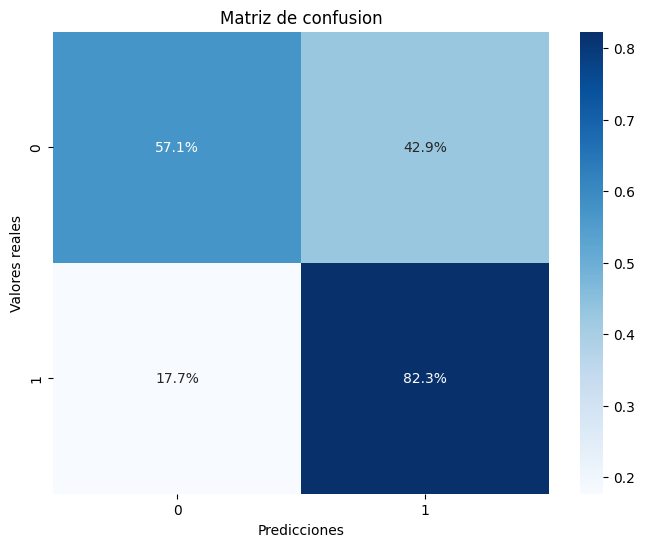

In [29]:
matriz_confusion(y_test,y_pred)

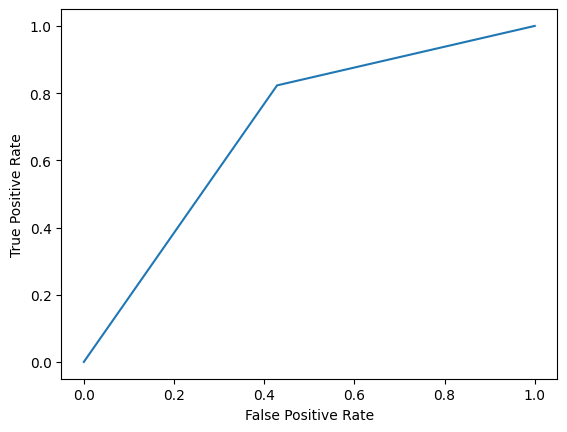

In [30]:
plot_roc_curve(y_test, y_pred)

Tambien quisimos probar el uso de redes neuronales.

# MLP

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [32]:
model = Sequential()
# Especificamos la cantidad de atributos que entran al modelo
model.add(Input(shape=(17,)))

# añadimos capas
# usamos 2 capas relu la cual produce una salida que es exactamente la entrada si es positiva; de lo contrario, produce 0,
# La usamos ya que es Rápida de calcular y ayuda a mitigar el problema de desaparición del gradiente (valores menores que 1 se reducen exponencialmente a medida que se propagan).
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Y utilizamos una funcion de salida sigmoide, para obtener un output de clasificación binaria.
model.add(Dense(1, activation='sigmoid'))
# Compilamos el modelo con una funcion de optimizacion adam y como metrica a obtener el accuracy
model.compile(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
# entrenamso el modelos, hacien 9 repasos en los datos con un tamaño maximo de datos por repaso de 30. Debido a que más epochs sobreajustaria
model.fit(X_train, y_train, epochs=9, batch_size=30)

y_pred = model.predict(X_test)
binary_predictions = (y_pred > 0.5).astype('int32')



Epoch 1/9


39/39 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.6902
Epoch 2/9
39/39 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7276
Epoch 3/9
39/39 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7337
Epoch 4/9
39/39 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7424
Epoch 5/9
39/39 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7441
Epoch 6/9
39/39 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7528
Epoch 7/9
39/39 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7589
Epoch 8/9
39/39 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7607
Epoch 9/9
12/12 [==============================] - 0s 1ms/step


In [33]:
print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       140
           1       0.78      0.81      0.80       243

    accuracy                           0.73       383
   macro avg       0.71      0.70      0.71       383
weighted avg       0.73      0.73      0.73       383



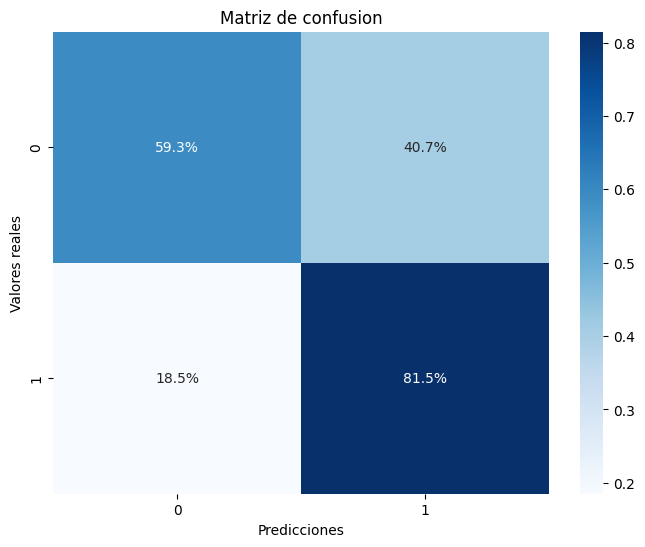

In [34]:
matriz_confusion(y_test,binary_predictions)

### Utilizamos la libreria SHAP para explicar las variables que más peso tienen en las predicciones.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, target, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(criterion=best_criterion, max_depth=best_Deep, n_estimators=150)
rfc.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='log_loss', max_depth=6, n_estimators=150)

In [36]:
y_pred = rfc.predict(X_test)

In [37]:
to_explain = X_test.join(y_test).join(pd.DataFrame(y_pred, columns=['pred'], index=X_test.index)).reset_index(drop=True)
to_explain

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT,target,pred
0,-0.026074,0.938326,-0.672487,0.186255,-0.155968,-0.168565,0.216709,-0.539493,-0.573783,-0.195963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,-1.592550,1.267692,2.912358,2.400347,2.350172,2.334413,0.284764,-0.176035,-0.233705,0.654817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,-0.809312,-1.531915,-0.585051,-0.918226,-0.878198,-0.823395,-1.084844,-0.539493,-0.599943,-2.579100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,-0.026074,-0.543819,-0.672487,-0.793796,-0.726530,-0.693759,-0.370266,0.078385,-0.011347,0.704863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,-0.026074,-0.379136,-0.672487,-0.689890,-0.769864,-0.783507,0.046571,-0.539493,-0.586863,-0.195963,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.757164,0.608961,0.901348,0.755813,0.414594,0.585985,-0.174608,1.059722,1.192005,0.569024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
379,-0.026074,-0.420307,-0.016722,-0.417939,-0.466527,-0.514262,0.412367,-0.539493,-0.599943,-2.579100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
380,0.757164,0.773643,-0.497616,-0.297357,-0.155968,-0.251666,0.608026,-0.430456,-0.429904,0.354541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
381,-0.026074,0.361937,-0.628769,-0.355082,-0.488194,-0.564123,0.642053,-0.357764,-0.351424,0.430802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [38]:
!pip install shap

In [39]:
import shap

#to_explain = to_explain[to_explain['pred'] == 1]
np.bool = np.bool_

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(to_explain)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


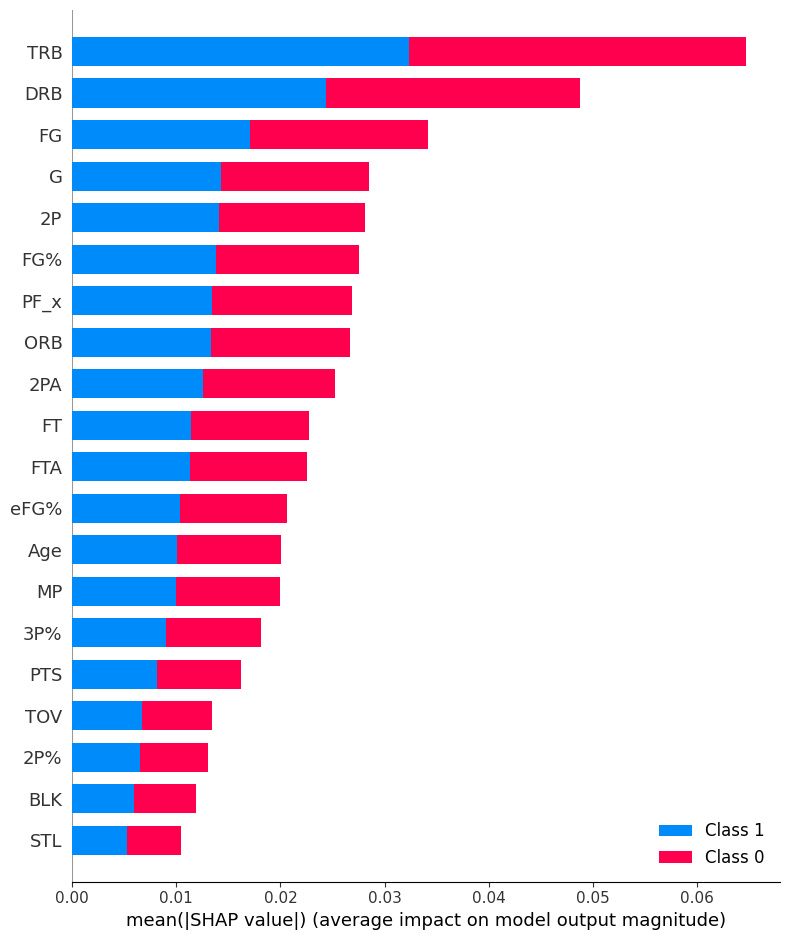

In [40]:
shap.summary_plot(shap_values, to_explain, plot_type="bar")

In [41]:
shap.initjs()
print(jugadores[1])
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], to_explain.iloc[1,:])

Noah Vonleh


In [42]:
a_ =to_explain.iloc[1]["target"]
b_ = to_explain.iloc[1]["pred"]
print(f"target: {a_}, pred: {b_}")

target: 1.0, pred: 1.0


In [43]:
shap.initjs()
print(jugadores[380])
shap.force_plot(explainer.expected_value[1], shap_values[1][380,:], to_explain.iloc[380,:])

Mahmoud Abdul-Rauf


In [44]:
a_ =to_explain.iloc[380]["target"]
b_ = to_explain.iloc[380]["pred"]
print(f"target: {a_}, pred: {b_}")

target: 1.0, pred: 1.0


In [45]:
shap.initjs()
print(jugadores[381])
shap.force_plot(explainer.expected_value[1], shap_values[1][381,:], to_explain.iloc[381,:])

Jerrod Mustaf


In [46]:
a_ =to_explain.iloc[381]["target"]
b_ = to_explain.iloc[381]["pred"]
print(f"target: {a_}, pred: {b_}")

target: 0.0, pred: 1.0


In [47]:
shap.initjs()
print(jugadores[16])
shap.force_plot(explainer.expected_value[1], shap_values[1][16,:], to_explain.iloc[16,:])

Trevor Ariza


In [48]:
a_ =to_explain.iloc[16]["target"]
b_ = to_explain.iloc[16]["pred"]
print(f"target: {a_}, pred: {b_}")

target: 1.0, pred: 0.0


In [49]:
shap.initjs()
print(jugadores[15])
shap.force_plot(explainer.expected_value[1], shap_values[1][15,:], to_explain.iloc[15,:])

Brandon Ingram


In [50]:
a_ =to_explain.iloc[15]["target"]
b_ = to_explain.iloc[15]["pred"]
print(f"target: {a_}, pred: {b_}")

target: 1.0, pred: 1.0


## si es <0.5 entonces predice 1 y si es mayor predice 0

### Usamos nuestro modelos con los roockies nuevos. (Probamos el funcionamiento del modelo, con antecedentes de jugadores que son muy bueno actualmente pero no han cumplido 5 años en la liga)

In [51]:
url = "https://raw.githubusercontent.com/JavoAlejandro/Longevidad_NBA/main/rookies.csv"
data_roockies = pd.read_csv(url)
data_roockies.pop("Unnamed: 0")
data_roockies.head()


,Player,Year
0,Joe Barry Carroll,1980
1,Darrell Griffith,1980
2,Kevin McHale,1980
3,Kelvin Ransey,1980
4,James Ray,1980


In [53]:
ulr = "all_stats.csv"
toda_la_data = pd.read_csv(ulr, index_col=None)
toda_la_data.pop("Unnamed: 0")
toda_la_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,3143,835,1383,0.604,...,190,696,886,371,81,280,297,216,2034,1980
1,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,318,0.481,...,62,129,191,87,35,12,39,118,362,1980
2,Alvan Adams,C,25,PHO,75,NaN,2168,465,875,0.531,...,158,451,609,322,108,55,218,237,1118,1980
3,Tiny Archibald*,PG,31,BOS,80,80.0,2864,383,794,0.482,...,59,138,197,671,106,10,242,218,1131,1980
4,Dennis Awtrey,C,31,CHI,26,NaN,560,27,60,0.450,...,29,86,115,40,12,15,27,66,86,1980


In [54]:
new_roockies = data_roockies[data_roockies["Year"] > 2018]

In [55]:
data_copy.columns

Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS', 'target', 'PF_y',
       'SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT'],
      dtype='object')

In [56]:
primera_season = toda_la_data.drop_duplicates(subset=['Player'],keep='first')

In [57]:
new_data = primera_season.merge(new_roockies, right_on="Player" , left_on="Player")

In [58]:
new_data[new_data["Player"] == "Zion Williamson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year_x,Year_y
47,Zion Williamson,PF,19,NOP,24,24.0,668,210,360,0.583,...,86,150,50,16,9,59,42,540,2020,2019


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
def normalice_teams(df):
    df.loc[:,'Tm'] = df['Tm'].replace('SDC', 'LAC')
    df.loc[:,'Tm'] = df['Tm'].replace('SEA', 'OKC')
    df.loc[:,'Tm'] = df['Tm'].replace('KCK', 'SAC')
    df.loc[:,'Tm'] = df['Tm'].replace('VAN', 'MEM')
    df.loc[:,'Tm'] = df['Tm'].replace('WSB', 'WAS')
    df.loc[:,'Tm'] = df['Tm'].replace('CHH', 'CHA').replace("CHO","CHA")
    df.loc[:,'Tm'] = df['Tm'].replace('NOH', 'NOK').replace("NOP","NOK")
    df.loc[:,'Tm'] = df['Tm'].replace("BKN","NJN").replace("BRK","NJN")
    return df

new_data = normalice_teams(new_data)

In [61]:
def OHE(df, colm):

    categorias = list(df[colm].unique())
    print(categorias)
    print(len(categorias))

    y = [[s] for s in df[colm]]

    enc = OneHotEncoder(categories=[categorias])
    enc.fit(y)
    ohe_type = enc.transform(y).toarray()

    df_ohe = pd.DataFrame(ohe_type, columns=categorias)
    df = df.drop(columns=[colm]).reset_index(drop=True)

    result = pd.merge(df, df_ohe, left_index=True, right_index=True)

    return result

In [62]:
new_data = OHE(new_data, "Tm")

['IND', 'NOK', 'NYK', 'DEN', 'UTA', 'MEM', 'NJN', 'MIN', 'BOS', 'ATL', 'CHI', 'CLE', 'SAC', 'WAS', 'TOR', 'MIA', 'LAL', 'PHO', 'SAS', 'LAC', 'POR', 'CHA', 'GSW', 'OKC', 'PHI', 'ORL', 'DET', 'DAL', 'MIL', 'HOU', 'TOT']
31


In [63]:
new_data = OHE(new_data, "Pos")

['PG', 'SG', 'PF', 'SF', 'C']
5


In [64]:
new_data = new_data.drop(columns = ["Year_x", "Year_y"])

In [65]:
new_data[['SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF']] = 0

In [66]:
new_data.shape

(139, 69)

In [67]:
jugadores_nuevos = new_data.pop("Player")

In [68]:
new_data

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,SG,PF_y,SF,C,SG-SF,PF-SF,SG-PG,SF-PF,PF-C,C-PF
0,24,82,82.0,2912,496,1159,0.428,4,42,0.095,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,21,47,1.0,591,98,266,0.368,46,133,0.346,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
2,19,56,55.0,1704,292,727,0.402,63,197,0.320,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
3,20,7,0.0,87,14,28,0.500,4,9,0.444,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
4,23,9,0.0,96,10,28,0.357,3,13,0.231,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,19,33,0.0,262,24,55,0.436,7,27,0.259,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
135,20,79,79.0,2429,456,975,0.468,96,271,0.354,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
136,22,29,0.0,205,20,56,0.357,14,43,0.326,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
137,23,50,35.0,1209,156,337,0.463,42,138,0.304,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0


In [69]:
new_data

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,SG,PF_y,SF,C,SG-SF,PF-SF,SG-PG,SF-PF,PF-C,C-PF
0,24,82,82.0,2912,496,1159,0.428,4,42,0.095,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,21,47,1.0,591,98,266,0.368,46,133,0.346,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
2,19,56,55.0,1704,292,727,0.402,63,197,0.320,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
3,20,7,0.0,87,14,28,0.500,4,9,0.444,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
4,23,9,0.0,96,10,28,0.357,3,13,0.231,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,19,33,0.0,262,24,55,0.436,7,27,0.259,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
135,20,79,79.0,2429,456,975,0.468,96,271,0.354,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
136,22,29,0.0,205,20,56,0.357,14,43,0.326,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
137,23,50,35.0,1209,156,337,0.463,42,138,0.304,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0


In [70]:
new_data[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA','3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB','TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS']]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF_x,PTS
0,24,82,82.0,2912,496,1159,0.428,4,42,0.095,...,0.864,102,124,226,440,110,23,202,178,1300
1,21,47,1.0,591,98,266,0.368,46,133,0.346,...,0.676,9,75,84,89,17,8,54,57,267
2,19,56,55.0,1704,292,727,0.402,63,197,0.320,...,0.614,50,229,279,143,55,17,124,122,803
3,20,7,0.0,87,14,28,0.500,4,9,0.444,...,0.800,5,14,19,6,2,6,10,11,40
4,23,9,0.0,96,10,28,0.357,3,13,0.231,...,0.500,2,18,20,11,3,5,7,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,19,33,0.0,262,24,55,0.436,7,27,0.259,...,0.600,11,32,43,19,8,11,10,26,67
135,20,79,79.0,2429,456,975,0.468,96,271,0.354,...,0.863,84,272,356,231,68,34,119,164,1197
136,22,29,0.0,205,20,56,0.357,14,43,0.326,...,0.538,4,10,14,9,4,3,2,14,61
137,23,50,35.0,1209,156,337,0.463,42,138,0.304,...,0.729,51,127,178,68,30,10,54,93,416


In [71]:
nuevos_datos_estandarizados = scaler.transform(new_data[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS']])

In [72]:
data_norm = pd.DataFrame(nuevos_datos_estandarizados, columns=['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS'])
data_norm[['PF_y','SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT']] = new_data[['PF_y','SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT']]

In [73]:
data_norm.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF_x', 'PTS', 'PF_y', 'SF', 'SG', 'C', 'PG',
       'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C', 'C-PF', 'MEM', 'CHA', 'BOS',
       'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU', 'UTA', 'SAC', 'GSW', 'LAL',
       'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL', 'CLE', 'PHO', 'NOK', 'CHI',
       'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL', 'TOR', 'TOT'],
      dtype='object')

In [74]:
data_norm["3P%"].fillna(0,inplace=True)
data_norm["FT%"].fillna(0,inplace=True)

In [75]:
nuevos_datos_transformados = pca.transform(data_norm)

In [76]:
rfc = RandomForestClassifier(criterion=best_criterion, max_depth=best_Deep, n_estimators=150)
rfc.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='log_loss', max_depth=6, n_estimators=150)

In [77]:
nuevos_datos_transformados.shape

(139, 17)

In [78]:
y_pred = rfc_sbert.predict(nuevos_datos_transformados)

In [79]:
jugadores_nuevos

0                  Johnny Davis
1      Nickeil Alexander-Walker
2                    RJ Barrett
3                       Bol Bol
4              Jarrell Brantley
                 ...           
134                     JT Thor
135                Franz Wagner
136                Joe Wieskamp
137               Aaron Wiggins
138             Ziaire Williams
Name: Player, Length: 139, dtype: object

In [80]:
def jugador_se_mantiene(nombre_jugador, y_pred):
  pos = jugadores_nuevos[jugadores_nuevos == nombre_jugador].index
  if len(y_pred[pos]) != 0:
    if y_pred[pos][0] == 1:
      return "Si se mantiene"
    return "No se mantiene"
  return f"{nombre_jugador} no esta en la data"

In [81]:
jugador_se_mantiene("LaMelo Ball", y_pred)

'LaMelo Ball no esta en la data'

In [82]:
jugador_se_mantiene("Zion Williamson", y_pred)

'Si se mantiene'

In [83]:
jugador_se_mantiene("Ja Morant", y_pred)

'Si se mantiene'

In [84]:
jugador_se_mantiene("Cade Cunningham",y_pred)

'Si se mantiene'

In [85]:
jugador_se_mantiene("Ignas Brazdeikis", y_pred)

'No se mantiene'

In [86]:
jugador_se_mantiene("Bol Bol", y_pred)

'Si se mantiene'

In [87]:
jugador_se_mantiene("Tyler Herro", y_pred)

'Si se mantiene'